# EDA Project

<div class="alert alert-block alert-info">The EDA project in this course has four main parts to it: <br>
    
1. Project Proposal
2. Phase 1
3. Phase 2
4. Report

This notebook will be used for Project Proposal, Phase 1, and Phase 2. You will have specific questions to answer within this notebook for Project Proposal and Phase 1. You will also continue using this notebook for Phase 2. However, guidance and expectations can be found on Canvas for that assignment. The report is completed outside of this notebook and details can be found on the EDA Report page on Canvas.</div>

<div class="alert alert-block alert-danger"><b><font size=4>Read this before proceeding:</font></b>
    
1. Review the list of data sets and sources of data to avoid before choosing your data. This list is provided in the instructions for the Project Proposal assignment in Canvas.<br><br>  

2. It is expected that when you are asked questions requiring typed explanations you are to use a <b><u>markdown cell</u></b> to type your answers neatly. <b><u><i>Do not provide typed answers to questions as extra comments within your code.</i></u></b> Only provide comments within your code as you normally would, i.e. as needed to explain or remind yourself what each part of the code is doing.</div>

# Project Proposal

<div class="alert alert-block alert-info">The intent of this assignment is for you to share your chosen data file(s) with your instructor and provide general information on your goals for the EDA project.</div>

<div class="alert alert-block alert-success"><b>Step 1 (2 pts)</b>: Give a brief <i><u>description</u></i> of the source(s) of your data and include a <i><u>direct link</u></i> to your data.</div>

The sources that I'll be using for my project proposal are as follows:
1. https://datasets.imdbws.com/
2. https://www.the-numbers.com/movie/budgets

The data includes 3 separate files:

**movie_budget**: includes production costs, domestic and worldwide gross (The Numbers)

**title_basics**: includes runtimes, title's type, genre, primary and original title (IMDB)

**title_akas**: includes title of film, region, language, format type

<div class="alert alert-block alert-success"><b>Step 2 (2 pts)</b>: Briefly explain why you chose this data.</div>

I'm interested in determining in which season do movies sell most as it is my hunch that colder seasons are the most lucrative for film studios.

<div class="alert alert-block alert-success"><b>Step 3 (1 pt)</b>: Provide a brief overview of your goals for this project.</div>

The goal of this project is to determine if movie sales are impacted by seasonal changes in the northern hemisphere particularly the US

<div class="alert alert-block alert-success"><b>Step 4 (1 pt)</b>: Read the data into this notebook.</div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# read data

movie_budget = pd.read_csv('movie_budget.csv')
title_basics = pd.read_csv('title.basics.tsv', sep='\t')
title_akas = pd.read_csv('title.akas.tsv', sep='\t')

/Users/chelciedealmeida/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/chelciedealmeida/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<div class="alert alert-block alert-success"><b>Step 5 (1 pt)</b>: Inspect the data using the <b>info(&nbsp;)</b>, <b>head(&nbsp;)</b>, and <b>tail(&nbsp;)</b> methods.</div>

In [3]:
# TODO: Use the info() method to determine to inspect the variable (column) names, the number of non-null values,
#       and the data types for each variable.
movie_budget.info() 
title_basics.info() 
title_akas.info()

# TODO: Use the head() method to inspect the first five (or more) rows of the data
movie_budget.head() 
title_basics.head() 
title_akas.head()

# TODO: Use the tail() method to inspect the last five (or more) rows of the data
movie_budget.tail() 
title_basics.tail() 
title_akas.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5817 entries, 0 to 5816
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Release Date       5817 non-null   object
 1   Movie              5817 non-null   object
 2   Production Budget  5817 non-null   object
 3   Domestic Gross     5817 non-null   object
 4   Worldwide Gross    5817 non-null   object
dtypes: object(5)
memory usage: 227.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8648763 entries, 0 to 8648762
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 593.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30770404 en

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
0,4/23/2019,Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,5/20/2011,Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,4/22/2015,Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"
3,12/16/2015,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,064,615,817"
4,4/25/2018,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,359,754"


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
5812,Unknown,Red 11,"$7,000",$0,$0
5813,4/2/1999,Following,"$6,000","$48,482","$240,495"
5814,7/13/2005,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5815,9/29/2015,A Plague So Pleasant,"$1,400",$0,$0
5816,8/5/2005,My Date With Drew,"$1,100","$181,041","$181,041"


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8648758,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8648759,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8648760,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8648761,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short
8648762,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0,2014,\N,10,"Adventure,Animation,Comedy"


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
30770399,tt9916852,5,Episódio #3.20,PT,pt,\N,\N,0
30770400,tt9916852,6,Episodio #3.20,IT,it,\N,\N,0
30770401,tt9916852,7,एपिसोड #3.20,IN,hi,\N,\N,0
30770402,tt9916856,1,The Wind,DE,\N,imdbDisplay,\N,0
30770403,tt9916856,2,The Wind,\N,\N,original,\N,1


In [4]:
movie_budget.shape
title_basics.shape
title_akas.shape

(5817, 5)

(8648763, 9)

(30770404, 8)

<div class="alert alert-block alert-danger"><b>STOP HERE for your Project Proposal assignment. Submit your (1) original data file(s) along with (2) the completed notebook up to this point, and (3) the html file for grading and approval.</b></div>

<div class="alert alert-block alert-warning"><b>Instructor Feedback and Approval (3 pts)</b>: Your instructor will provide feedback in either the cell below this or via Canvas. You can expect one of the following point values for this portion.

<b>3 pts</b> - if your project goals and data set are both approved.<br>
<b>2 pts</b> - if your data set is approved but changes to your project goals (Step 3) are needed.<br>
<b>1 pt</b> - if your project goals are approved but your data set is not approved.<br>
<b>0 pts</b> - if neither your data set nor your project goals are approved.<br><br>
    
<i><u>As needed, follow your instructor's feeback and guidance to get on track for the remaining portions of the EDA project.</u></i>
</div>

# EDA Phase 1

<div class="alert alert-block alert-info">The overall goal of this assignment is to take all necessary steps to inspect the quality of your data and prepare the data according to your needs. For information and resources on the process of Exploratory Data Analysis (EDA), you should explore the <b><u>EDA Project Resources Module</u></b> in Canvas.

Once you’ve read through the information provided in that module and have a comfortable understanding of EDA using Python, complete steps 6 through 10 listed below to satisfy the requirements for your EDA Phase 1 assignment. **Remember to convert code cells provided to markdown cells for any typed responses to questions.**</div>

<div class="alert alert-block alert-success"><b>Step 6 (2 pts)</b>: Begin by elaborating in more detail from the previous assignment on why you chose this data?<br>
    
1. Explain what you hope to learn from this data. 
2. Do you have a hunch about what this data will reveal? (The answer to this question will be used in the Introduction section of your EDA report.)
</div>

1. I'd like to know if film studios are intentional about their releases with regard to the seasons people are most 
   are most inclined to go to movie theaters.
2. I have a hunch that the film industry in North America generates most of their revenue during the winter. 

<div class="alert alert-block alert-success"><b>Step 7 (2 pts)</b>: Discuss the popluation and the sample:<br>
    
1. What is the population being represented by the data you’ve chosen? 
2. What is the total sample size?
</div>

1. Film sales in the U.S
2. 6222 based on the movie budgets dataframe, title_basics sample size is 8648763 and title_akas sample size is          30770404 but data analysis is will be determined by films with availale budget and gross figures

<div class="alert alert-block alert-success"><b>Step 8 (2 pts)</b>: Describe how the data was collected. For example, is this a random sample? Are sampling weights used with the data?</div>

The data was collected from IMDB and The numbers. IMDB's list is extensive and therefore inclusive of every film with
accreditation on their platform. Data from The Numbers, however, is based on films with the "biggest" production budget, domestic, and worldwide gross. It is, however, important to note that "The Number" data set is reflective of data where movie figures are available and therefore may include some bias since the data provided isn't exhaustive of every film ever made and their respective financial data. The heterogeneity of the data suggests the sample is partially random therefore a stratified random sample.

<div class="alert alert-block alert-success"><b>Step 9 (4 pts)</b>: In the Project Proposal assignment you used the info(&nbsp;) method to inspect the variables, their data types, and the number of non-null values. Using that information as a guide, provide definitions of each of your variables and their corresponding data types, i.e. a data dictionary. Also indicate which variables will be used for your purposes.</div>

# **_Data Dictionary:_**


### NOTE: 
**_Most variables were imported as objects but will be converted to their respective data types as shown the data dictionary._**

#### Additional Notes:
##### * variables with Included = 'Y' symbol denote variables that will be used in this analysis
##### * variables with Included = 'N' symbol denote variables that will not be used in this analysis

#### movie_budget:

| Column Name       | Column Description                                        | Data Type | Included |
|-------------------|-----------------------------------------------------------|-----------|----------|
| Release Date      | date which the movie was released                         | date      | Y        |
| Movie             | Name of the movie                                         | str       | Y        |
| Production Budget | Cost to make the movie                                    | int       | Y        |
| Domestic Gross    | the gross or total amount the movie produced domestically | int       | Y        |
| Worldwide Gross   | the gross or total amount the movie produced worldwide    | int       | Y        |

* All the columns in the movie_budget df are crucial to analysis as they pertain to either date the film was released
  or the financials of the movies which are the primary variables used in this EDA

#### title_basics: As described by [IMDB](https://www.imdb.com/interfaces/) 

| Column Name    | Column Description                                                                                         | Data Type | Included |
|----------------|------------------------------------------------------------------------------------------------------------|-----------|----------|
| tconst         | alphanumeric unique identifier of the title                                                                | str       | Y        |
| titleType      | the type/format of the title                                                                               | str       | Y        |
| primaryTitle   | the more popular title / the title used by the filmmakers on promotional materials at the point of release | str       | Y        |
| originalTitle  | original title, in the original language                                                                   | str       | Y        |
| isAdult        | 0: non-adult title; 1: adult title                                                                         | int       | N        |
| startYear      | represents the release year of a title. In the case of TV Series, it is the series start year              | int       | N        |
| endYear        | TV Series end year. ‘\N’ for all other title types                                                         | int       | N        |
| runtimeMinutes | primary runtime of the title, in minutes                                                                   | int       | Y        |
| genres         | includes up to three genres associated with the title                                                      | str       | N        |


* tconst is IMBDs unique identifier for movies
* titletype will be used to exclude any format that is not a movie
* Title fields will be used to compare titles with The Numbers data set.
* Start year is the release date of the film unless the format is != Movie then it signifies TV show, short etc.


#### title_akas: As described by [IMDB](https://www.imdb.com/interfaces/) 

| Column Name     | Column Description                                                                                                                                                                                                                              | Data Type | Included |
|-----------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|----------|
| titleId         | a tconst, an alphanumeric unique identifier of the title                                                                                                                                                                                        | str       | Y        |
| ordering        | a number to uniquely identify rows for a given titleId                                                                                                                                                                                          | int       | N        |
| title           | the localized title                                                                                                                                                                                                                             | str       | Y        |
| region          | the region for this version of the title                                                                                                                                                                                                        | str       | Y        |
| language        | the language of the title                                                                                                                                                                                                                       | str       | N        |
| types           | Enumerated set of attributes for this <br>alternative title. One or more of the following: "alternative", "dvd", <br>"festival", "tv", "video", "working", "original", "imdbDisplay". New <br>values may be added in the future without warning | str       | N        |
| attributes      | Additional terms to describe this alternative title, not enumerated                                                                                                                                                                             | str       | N        |
| isOriginalTitle | 0: not original title; 1: original title                                                                                                                                                                                                        | int       | N        |

* title can also be used to compare movie titles with The Numbers dataset
* region will be used to eliminate records that are not within the parameters of this analysis
* isOriginalTitle in conjunction with language and region could further isolate US movies



<div class="alert alert-block alert-success"><b>Step 10 (10 pts)</b>: For full credit in this problem you'll want to <i><u>take all necessary steps to report on the quality of the data</u></i> and <i><u>clean the data accordingly</u></i>. Some things to consider while doing this are listed below. <b>Depending on your data and goals, there may be additional steps needed than those listed here.</b>
    
1. Are there rows with missing or inconsistent values? If so, eliminate those rows from your data where appropriate.
2. Are there any outliers or duplicate rows? If so, eliminate those rows from your data where appropriate. 
At each stage of cleaning the data, state how many rows were eliminated.
3. Are you using all columns (variables) in the data? If not, are you eliminating those columns?
4. Consider some type of visual display such as a boxplot to determine any outliers. Do any outliers need removed? If so, how many were removed?

At each stage of cleaning the data, state how many rows were eliminated. <b><u><i>It is good practice to get the shape of the data before and after each step in cleaning the data and add typed explanations (in separate markdown cells) of the steps taken to clean the data.</i></u></b><br></div>
    
<div class="alert alert-block alert-info">Include the rest of your work below and insert cells where needed.</div>

### movie_budget

In [5]:
movie_budget.shape
movie_budget.value_counts()

(5817, 5)

Release Date  Movie                                       Production Budget  Domestic Gross  Worldwide Gross
1/1/1959      Solomon and Sheba                            $5,000,000         $11,000,000     $11,016,959       1
6/15/1990     Dick Tracy                                   $47,000,000        $103,738,726    $162,738,726      1
6/15/1977     A Bridge Too Far                             $26,000,000        $50,800,000     $50,800,000       1
6/15/1960     The Apartment                                $3,000,000         $18,600,000     $24,600,000       1
6/15/1905     The Nutcracker                               $19,000,000        $2,119,994      $2,119,994        1
                                                                                                               ..
12/3/2015     Under sandet                                 $6,000,000         $434,640        $4,959,039        1
              Speak No Evil                                $150,000           $0             

In [6]:
#identified 90 movies in the movie budget df that have unknown release dates
unkDates = movie_budget.loc[movie_budget['Release Date'] == 'Unknown']
unkDates

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross
247,Unknown,Desert Warrior,"$140,000,000",$0,$0
811,Unknown,b,"$70,000,000",$0,$0
1290,Unknown,Hannibal the Conqueror,"$50,000,000",$0,$0
1462,Unknown,Les Bronzés 3: amis pour la vie,"$42,000,000",$0,"$83,833,602"
1650,Unknown,Down Under Cover,"$40,000,000",$0,$0
...,...,...,...,...,...
5790,Unknown,Flywheel,"$20,000",$0,$0
5796,Unknown,Stories of Our Lives,"$15,000",$0,$0
5799,Unknown,Tin Can Man,"$12,000",$0,$0
5811,Unknown,The Mongol King,"$7,000",$900,$900


In [7]:
# Remove rows with Release Date = Unknown. Should drop 90 rows
movie_budget = movie_budget.drop(unkDates.index)
movie_budget.shape

(5727, 5)

In [8]:
# change the release date column to date data types
movie_budget['Release Date'] = movie_budget['Release Date'].astype('datetime64[ns]') 

In [9]:
# Convert Production Budget to int and remove nondigit characters
movie_budget['Production Budget'] = movie_budget['Production Budget'].replace("[$,]", "", regex=True).astype(int)

In [10]:
# Convert Domestic Gross to int and remove nondigit characters
movie_budget['Domestic Gross'] = movie_budget['Domestic Gross'].replace("[$,]", "", regex=True).astype(int)

In [11]:
# Convert Worldwide Gross to int and remove nondigit characters
movie_budget['Worldwide Gross'] = movie_budget['Worldwide Gross'].replace("[$,]", "", regex=True).astype(int)

In [12]:
movie_budget['Gross Profit'] = movie_budget['Worldwide Gross'] - movie_budget['Production Budget']

In [13]:
movie_budget['Non-Domestic Gross'] = movie_budget['Worldwide Gross'] - movie_budget['Domestic Gross']

In [94]:
movie_budget['Difference(%)'] = round(movie_budget['Domestic Gross'] / movie_budget['Non-Domestic Gross'] * 100,2)

In [95]:
# Display df to assess the three financial fields
movie_budget.head()
movie_budget.info()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis,Difference(%)
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall,44.26
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,666713802,804642000,05,2011,Spring,Fall,29.96
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,1030316979,936311111,04,2015,Spring,Fall,49.02
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,1758615817,1127953592,12,2015,Winter,Summer,83.04
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall,49.57


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 5816
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Release Date        5281 non-null   object 
 1   Movie               5281 non-null   object 
 2   Production Budget   5281 non-null   int64  
 3   Domestic Gross      5281 non-null   int64  
 4   Worldwide Gross     5281 non-null   int64  
 5   Gross Profit        5281 non-null   int64  
 6   Non-Domestic Gross  5281 non-null   int64  
 7   month               5281 non-null   object 
 8   year                5281 non-null   object 
 9   Season_N_Hemis      5281 non-null   object 
 10  Season_S_Hemis      5281 non-null   object 
 11  Difference(%)       5281 non-null   float64
dtypes: float64(1), int64(5), object(6)
memory usage: 536.4+ KB


In [15]:
# Converting Movie object to string
movie_budget['Movie'] = movie_budget['Movie'].astype(str)

In [16]:
# Check to make sure the movie field doesn't contain blanks and NaNs
movie_budget[movie_budget['Movie'] == ''].index
pd.isna(movie_budget['Movie'])

Int64Index([], dtype='int64')

0       False
1       False
2       False
3       False
4       False
        ...  
5810    False
5813    False
5814    False
5815    False
5816    False
Name: Movie, Length: 5727, dtype: bool

In [17]:
# Check that none of the movies have a production budget = 0 as they're most likely bad data
movie_budget.loc[movie_budget['Production Budget'] == 0]

# Check that none of the movies have a Domestic and worldwide Gross = 0 as they're most likely bad data, 
# streaming movies or the movie is newly released and financial figures have yet to be released

movie_budget.loc[movie_budget['Domestic Gross'] == 0]
movie_budget.loc[movie_budget['Worldwide Gross'] == 0]

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross


,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross
75,2020-09-04,Mulan,200000000,0,69965374,-130034626,69965374
166,2019-11-01,The Irishman,159000000,0,910234,-158089766,910234
220,2021-11-04,Red Notice,150000000,0,173638,-149826362,173638
221,2022-02-03,Moonfall,150000000,0,0,-150000000,0
246,2022-05-27,Top Gun: Maverick,140000000,0,0,-140000000,0
...,...,...,...,...,...,...,...
5791,2013-01-04,All Superheroes Must Die,20000,0,0,-20000,0
5792,2015-04-21,The Front Man,20000,0,0,-20000,0
5793,2011-11-25,The Ridges,17300,0,0,-17300,0
5806,2015-05-19,Family Motocross,10000,0,0,-10000,0


,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross
221,2022-02-03,Moonfall,150000000,0,0,-150000000,0
246,2022-05-27,Top Gun: Maverick,140000000,0,0,-140000000,0
447,2022-03-03,The Batman,100000000,0,0,-100000000,0
448,2020-06-12,Artemis Fowl,100000000,0,0,-100000000,0
482,2022-04-28,65,91000000,0,0,-91000000,0
...,...,...,...,...,...,...,...
5791,2013-01-04,All Superheroes Must Die,20000,0,0,-20000,0
5792,2015-04-21,The Front Man,20000,0,0,-20000,0
5793,2011-11-25,The Ridges,17300,0,0,-17300,0
5806,2015-05-19,Family Motocross,10000,0,0,-10000,0


In [18]:
# Drop movies with Domestic Gross = 0
movie_budget.shape
domesticDrop = movie_budget.loc[movie_budget['Domestic Gross'] == 0]
movie_budget = movie_budget.drop(domesticDrop.index)
worldDrop = movie_budget.loc[movie_budget['Worldwide Gross'] == 0]
movie_budget = movie_budget.drop(worldDrop.index)
movie_budget.shape

(5727, 7)

(5281, 7)

In [19]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 5816
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Release Date        5281 non-null   datetime64[ns]
 1   Movie               5281 non-null   object        
 2   Production Budget   5281 non-null   int64         
 3   Domestic Gross      5281 non-null   int64         
 4   Worldwide Gross     5281 non-null   int64         
 5   Gross Profit        5281 non-null   int64         
 6   Non-Domestic Gross  5281 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 459.1+ KB


In [20]:
# extract month from release date in order to create seasons field
movie_budget['Release Date'] = movie_budget['Release Date'].astype(str) 
movie_budget['month'] = movie_budget['Release Date'].str[5:7]
movie_budget.head()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,666713802,804642000,05
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,1030316979,936311111,04
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,1758615817,1127953592,12
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04


In [21]:
# extract year from release date
movie_budget['year'] = movie_budget['Release Date'].str[:4]
movie_budget.head()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,666713802,804642000,05,2011
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,1030316979,936311111,04,2015
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,1758615817,1127953592,12,2015
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018


In [22]:
# create a field called 'Season_N_Hemis' using the 'month' variable
# create a field called 'Season_S_Hemis' using the 'month' variable

seasonN = {'01' : 'Winter', '12' : 'Winter', '02' : 'Winter',
           '03' : 'Spring', '04' : 'Spring', '05' : 'Spring',
           '06' : 'Summer', '07' : 'Summer', '08' : 'Summer',
           '09' : 'Fall',   '10' : 'Fall',   '11' : 'Fall'}
movie_budget['Season_N_Hemis'] = movie_budget['month'].map(seasonN)

seasonS = {'01' : 'Summer', '12' : 'Summer', '02' : 'Summer',
           '03' : 'Fall', '04' : 'Fall', '05' : 'Fall',
           '06' : 'Winter', '07' : 'Winter', '08' : 'Winter',
           '09' : 'Spring', '10' : 'Spring', '11' : 'Spring'}
movie_budget['Season_S_Hemis'] = movie_budget['month'].map(seasonS)
movie_budget.head()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,666713802,804642000,05,2011,Spring,Fall
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,1030316979,936311111,04,2015,Spring,Fall
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,1758615817,1127953592,12,2015,Winter,Summer
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall


In [23]:
# Finding highest gross based on hemisphere in order to determine categorical value for seasons based on hemisphere

#nGross = movie_budget.groupby(['Season_N_Hemis'])['Domestic Gross'].agg(['sum','count']) \
#.sort_values(by = ['sum'] , ascending=False).reset_index()
#nGross.head(50)

#sGross 

In [24]:
# create an ID for Seasons in order to incorporate seasons into a heatmap if needed

#seasonId = {'Summer' : 4, 'Spring' : 3, 'Fall' : 2, 'Winter' : 1}


### title_basics

In [25]:
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8648763 entries, 0 to 8648762
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 593.9+ MB


In [26]:
# Drop three columns that we won't need
title_basics.drop(['isAdult', 'startYear', 'endYear'], axis=1, inplace=True)

# Getting info to get dimension of df
title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8648763 entries, 0 to 8648762
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   runtimeMinutes  object
 5   genres          object
dtypes: object(6)
memory usage: 395.9+ MB


In [27]:
title_basics.shape
title_basics.head()

(8648763, 6)

,tconst,titleType,primaryTitle,originalTitle,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,1,"Comedy,Short"


In [28]:
# Check the titleType to determine which non-relevant values to from the dataset as it pertains to the objective 
# of this analysis
title_basics['titleType'].value_counts()

tvEpisode       6465119
short            853167
movie            600289
video            257070
tvSeries         220118
tvMovie          134681
tvMiniSeries      41798
tvSpecial         35779
videoGame         30295
tvShort           10445
tvPilot               2
Name: titleType, dtype: int64

In [29]:
# Check table count
title_basics.shape

# Drop rows where value != movie
title_basics = title_basics[title_basics['titleType'].isin(['movie']) == True]

#title_basics.drop(title_basics[title_basics.titleType.isin(["", ""])].index)

# Check table count
title_basics.info()

(8648763, 6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600289 entries, 498 to 8648713
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          600289 non-null  object
 1   titleType       600289 non-null  object
 2   primaryTitle    600289 non-null  object
 3   originalTitle   600289 non-null  object
 4   runtimeMinutes  600289 non-null  object
 5   genres          600289 non-null  object
dtypes: object(6)
memory usage: 32.1+ MB


In [30]:
title_basics['titleType'].value_counts()

movie    600289
Name: titleType, dtype: int64

In [31]:
# converting titleType to Str
title_basics['titleType'] = title_basics['titleType'].astype(str)

# converting primaryTitle to Str
title_basics['primaryTitle'] = title_basics['primaryTitle'].astype(str)

# converting originalTitle to Str
title_basics['originalTitle'] = title_basics['originalTitle'].astype(str)

# converting genres to Str
title_basics['genres'] = title_basics['genres'].astype(str)

title_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600289 entries, 498 to 8648713
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   tconst          600289 non-null  object
 1   titleType       600289 non-null  object
 2   primaryTitle    600289 non-null  object
 3   originalTitle   600289 non-null  object
 4   runtimeMinutes  600289 non-null  object
 5   genres          600289 non-null  object
dtypes: object(6)
memory usage: 32.1+ MB


In [32]:
# Check runtimeMinutes
title_basics['runtimeMinutes'].value_counts()

\N       222840
90        25596
80        11364
60        10678
85        10667
          ...  
339           1
990           1
341           1
28643         1
1320          1
Name: runtimeMinutes, Length: 489, dtype: int64

In [33]:
# Checking runtime for faulty data
title_basics.loc[title_basics['runtimeMinutes'] == 'N'] #won't return anything because value is \N

,tconst,titleType,primaryTitle,originalTitle,runtimeMinutes,genres


In [34]:
# need to perform regex to replace runtime where value is \N with NN
title_basics['runtimeMinutes'] = title_basics['runtimeMinutes'].str.replace('\\', 'N')

<ipython-input-34-5a9085aba699>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  title_basics['runtimeMinutes'] = title_basics['runtimeMinutes'].str.replace('\\', 'N')


In [35]:
# Checks values to ensure NN is present
title_basics['runtimeMinutes'].value_counts()

NN      222840
90       25596
80       11364
60       10678
85       10667
         ...  
4080         1
1500         1
1320         1
990          1
326          1
Name: runtimeMinutes, Length: 489, dtype: int64

In [36]:
# Checking runtime for faulty data with NN 
title_basics.loc[title_basics['runtimeMinutes'] == 'NN']

,tconst,titleType,primaryTitle,originalTitle,runtimeMinutes,genres
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,NN,Drama
625,tt0000630,movie,Hamlet,Amleto,NN,Drama
668,tt0000675,movie,Don Quijote,Don Quijote,NN,Drama
729,tt0000739,movie,El pastorcito de Torrente,El pastorcito de Torrente,NN,Drama
783,tt0000793,movie,Andreas Hofer,Andreas Hofer,NN,Drama
...,...,...,...,...,...,...
8648439,tt9916178,movie,Yesterday's Dreams,Yesterday's Dreams,NN,\N
8648443,tt9916188,movie,Minotaur,Minotaur,NN,Thriller
8648560,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,NN,"Adventure,History,War"
8648652,tt9916620,movie,The Copeland Case,The Copeland Case,NN,Drama


In [37]:
# Drop rows with runtime = NN
title_basics.shape
dropRuntime = title_basics.loc[title_basics['runtimeMinutes'] == 'NN']
title_basics.drop(dropRuntime.index, inplace=True)
title_basics.shape

(600289, 6)

(377449, 6)

In [38]:
# Re-check runtime for faulty data with NN
title_basics.loc[title_basics['runtimeMinutes'] == 'NN']

,tconst,titleType,primaryTitle,originalTitle,runtimeMinutes,genres


In [39]:
title_basics.shape

# Dropping Genres as there are too many variations per movie to consider for analysis leading to inconclusive results
# Dropping runtime as merge will occur on movie titles creating duplicates in the event of movies sharing the same title
title_basics.drop(['genres','runtimeMinutes'], axis=1, inplace=True)

title_basics.shape

(377449, 6)

(377449, 4)

In [40]:
#Drop duplicates
title_basics.shape
title_basics.drop_duplicates(inplace=True)
title_basics.info()
title_basics.shape

(377449, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377449 entries, 498 to 8648713
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         377449 non-null  object
 1   titleType      377449 non-null  object
 2   primaryTitle   377449 non-null  object
 3   originalTitle  377449 non-null  object
dtypes: object(4)
memory usage: 14.4+ MB


(377449, 4)

### title_akas

In [41]:
title_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [42]:
title_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30770404 entries, 0 to 30770403
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 1.8+ GB


In [43]:
#Drop ordering, types, attributes, 
title_akas.drop(['ordering','types','attributes'], axis=1, inplace=True)
title_akas.info

<bound method DataFrame.info of             titleId                      title region language isOriginalTitle
0         tt0000001                 Карменсіта     UA       \N               0
1         tt0000001                 Carmencita     DE       \N               0
2         tt0000001  Carmencita - spanyol tánc     HU       \N               0
3         tt0000001                 Καρμενσίτα     GR       \N               0
4         tt0000001                 Карменсита     RU       \N               0
...             ...                        ...    ...      ...             ...
30770399  tt9916852             Episódio #3.20     PT       pt               0
30770400  tt9916852             Episodio #3.20     IT       it               0
30770401  tt9916852               एपिसोड #3.20     IN       hi               0
30770402  tt9916856                   The Wind     DE       \N               0
30770403  tt9916856                   The Wind     \N       \N               1

[30770404 rows x 5 

In [44]:
title_akas.head()

,titleId,title,region,language,isOriginalTitle
0,tt0000001,Карменсіта,UA,\N,0
1,tt0000001,Carmencita,DE,\N,0
2,tt0000001,Carmencita - spanyol tánc,HU,\N,0
3,tt0000001,Καρμενσίτα,GR,\N,0
4,tt0000001,Карменсита,RU,\N,0


In [45]:
# check values in language to determine if the field has sufficient, useful data
title_akas['language'].value_counts()

\N     6059470
ja     3522592
fr     3490263
hi     3458351
es     3442396
        ...   
sq           1
am           1
roa          1
br           1
qac          1
Name: language, Length: 106, dtype: int64

In [46]:
# Check data related to en=english language
lang_df = title_akas.loc[title_akas['language'] == 'en']
lang_df

,titleId,title,region,language,isOriginalTitle
39,tt0000005,Blacksmith Scene,CA,en,0
95,tt0000010,La sortie de l'usine Lumière à Lyon,CA,en,0
116,tt0000012,The Arrival of a Train,XWW,en,0
117,tt0000012,L'arrivée d'un train à La Ciotat,CA,en,0
120,tt0000012,The Arrival of a Train,XEU,en,0
...,...,...,...,...,...
30769734,tt9916428,The Secret of China,XWW,en,0
30769989,tt9916634,Eugène,XWW,en,0
30770120,tt9916720,The Nun 2,IN,en,0
30770121,tt9916720,Valak,XWW,en,0


In [47]:
# check originalTitles where region is US
original_df = title_akas[(title_akas['isOriginalTitle'] == '1') & (title_akas['region'] == 'US') ]
original_df.info

<bound method DataFrame.info of             titleId                   title region language isOriginalTitle
279005    tt0045383     The RCA Victor Show     US       \N               1
505963    tt0068120  The New Price Is Right     US       en               1
1901081   tt0442567      When Tomorrow Hits     US       \N               1
12593763  tt1430116                 Shadows     US       \N               1
21180751  tt3665498               Encounter     US       \N               1
21766242  tt4106508                  Little     US       \N               1
23362209  tt5215088         Ederlezi Rising     US       en               1>

In [48]:
# the above combination isn't going to work as it only produced 7 records so check US region 
title_akas_df = title_akas.loc[title_akas['region'] == 'US'].copy()
title_akas_df #produces more realistic results without language and isOriginalTitle

,titleId,title,region,language,isOriginalTitle
5,tt0000001,Carmencita,US,\N,0
14,tt0000002,The Clown and His Dogs,US,\N,0
33,tt0000005,Blacksmith Scene,US,\N,0
36,tt0000005,Blacksmithing Scene,US,\N,0
41,tt0000005,Blacksmith Scene #1,US,\N,0
...,...,...,...,...,...
30770075,tt9916702,Loving London: The Playground,US,\N,0
30770113,tt9916720,The Demonic Nun,US,\N,0
30770115,tt9916720,The Nun 2,US,\N,0
30770132,tt9916756,Pretty Pretty Black Girl,US,\N,0


In [49]:
title_akas_df.head()

,titleId,title,region,language,isOriginalTitle
5,tt0000001,Carmencita,US,\N,0
14,tt0000002,The Clown and His Dogs,US,\N,0
33,tt0000005,Blacksmith Scene,US,\N,0
36,tt0000005,Blacksmithing Scene,US,\N,0
41,tt0000005,Blacksmith Scene #1,US,\N,0


In [50]:
title_akas_df.info()
title_akas_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295121 entries, 5 to 30770148
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1295121 non-null  object
 1   title            1295121 non-null  object
 2   region           1295121 non-null  object
 3   language         1295121 non-null  object
 4   isOriginalTitle  1295121 non-null  object
dtypes: object(5)
memory usage: 59.3+ MB


(1295121, 5)

In [51]:
title_akas_df.drop_duplicates(inplace=True)

In [52]:
title_akas_df.shape

(1295119, 5)

In [53]:
title_akas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295119 entries, 5 to 30770148
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   titleId          1295119 non-null  object
 1   title            1295119 non-null  object
 2   region           1295119 non-null  object
 3   language         1295119 non-null  object
 4   isOriginalTitle  1295119 non-null  object
dtypes: object(5)
memory usage: 59.3+ MB


In [54]:
# merge title_basics and title_akas_df

title_df = pd.merge(title_basics, title_akas_df, left_on='tconst', right_on='titleId')

In [55]:
title_df.head(30)
title_df.info()

,tconst,titleType,primaryTitle,originalTitle,titleId,title,region,language,isOriginalTitle
0,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,tt0000574,The Story of the Kelly Gang,US,\N,0
1,tt0000591,movie,The Prodigal Son,L'enfant prodigue,tt0000591,The Prodigal Son,US,\N,0
2,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,tt0000679,The Fairylogue and Radio-Plays,US,\N,0
3,tt0001285,movie,The Life of Moses,The Life of Moses,tt0001285,Forty Years in the Land of the Midian,US,\N,0
4,tt0001285,movie,The Life of Moses,The Life of Moses,tt0001285,The Victory of Israel,US,\N,0
5,tt0001285,movie,The Life of Moses,The Life of Moses,tt0001285,The Life of Moses,US,\N,0
6,tt0001285,movie,The Life of Moses,The Life of Moses,tt0001285,The Plagues of Egypt,US,\N,0
7,tt0001285,movie,The Life of Moses,The Life of Moses,tt0001285,The Promised Land,US,\N,0
8,tt0001498,movie,The Battle of Trafalgar,The Battle of Trafalgar,tt0001498,The Battle of Trafalgar,US,\N,0
9,tt0001592,movie,In the Prime of Life,Ekspeditricen,tt0001592,In the Prime of Life,US,\N,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219436 entries, 0 to 219435
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   tconst           219436 non-null  object
 1   titleType        219436 non-null  object
 2   primaryTitle     219436 non-null  object
 3   originalTitle    219436 non-null  object
 4   titleId          219436 non-null  object
 5   title            219436 non-null  object
 6   region           219436 non-null  object
 7   language         219436 non-null  object
 8   isOriginalTitle  219436 non-null  object
dtypes: object(9)
memory usage: 16.7+ MB


the merged dataframe title_df clearly has duplicates and it appears that there are some inconsistencies between all title fields. According to IMDB, primaryTitle is the more popular title that is used by filmmakers on promotional materials and the point of release and originalTitle is the title in its original language which we may be able to leverage to if we can detect language that isn't in english. We can use tt0001892 as example. We notice that this produces several results where original title is noted but the region is missing. Simply selecting US as a region may present issues for the analysis. It's a hunch that once we merge with the movie budget df, most of these discrepancies will be eliminated from the dataset therefore, we will use primaryTitle moving forward and may return to eliminate residual foreign films based on language.

In [56]:
lang_df2 = title_akas.loc[title_akas['titleId'] == 'tt0001892']
lang_df2

,titleId,title,region,language,isOriginalTitle
5713,tt0001892,Den svarta drömmen,FI,sv,0
5714,tt0001892,Der schwarze Traum,DE,\N,0
5715,tt0001892,Svarta drömmen,SE,\N,0
5716,tt0001892,A fekete álom,HU,\N,0
5717,tt0001892,The Black Dream,US,\N,0
5718,tt0001892,Synkkä unelma,FI,\N,0
5719,tt0001892,O sonho negro,PT,\N,0
5720,tt0001892,Чёрный сон,RU,\N,0
5721,tt0001892,The Black Dream,AU,\N,0
5722,tt0001892,Musta uni,FI,\N,0


In [57]:
#creating new df based on title_df to continue analysis
newTitle_df = title_df.copy()
newTitle_df.head()

,tconst,titleType,primaryTitle,originalTitle,titleId,title,region,language,isOriginalTitle
0,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,tt0000574,The Story of the Kelly Gang,US,\N,0
1,tt0000591,movie,The Prodigal Son,L'enfant prodigue,tt0000591,The Prodigal Son,US,\N,0
2,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,tt0000679,The Fairylogue and Radio-Plays,US,\N,0
3,tt0001285,movie,The Life of Moses,The Life of Moses,tt0001285,Forty Years in the Land of the Midian,US,\N,0
4,tt0001285,movie,The Life of Moses,The Life of Moses,tt0001285,The Victory of Israel,US,\N,0


In [58]:
newTitle_df.shape
newTitle_df.drop_duplicates(inplace=True)
newTitle_df.info()
newTitle_df.head()
newTitle_df.shape

(219436, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219436 entries, 0 to 219435
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   tconst           219436 non-null  object
 1   titleType        219436 non-null  object
 2   primaryTitle     219436 non-null  object
 3   originalTitle    219436 non-null  object
 4   titleId          219436 non-null  object
 5   title            219436 non-null  object
 6   region           219436 non-null  object
 7   language         219436 non-null  object
 8   isOriginalTitle  219436 non-null  object
dtypes: object(9)
memory usage: 16.7+ MB


,tconst,titleType,primaryTitle,originalTitle,titleId,title,region,language,isOriginalTitle
0,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,tt0000574,The Story of the Kelly Gang,US,\N,0
1,tt0000591,movie,The Prodigal Son,L'enfant prodigue,tt0000591,The Prodigal Son,US,\N,0
2,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,tt0000679,The Fairylogue and Radio-Plays,US,\N,0
3,tt0001285,movie,The Life of Moses,The Life of Moses,tt0001285,Forty Years in the Land of the Midian,US,\N,0
4,tt0001285,movie,The Life of Moses,The Life of Moses,tt0001285,The Victory of Israel,US,\N,0


(219436, 9)

In [59]:
# drop originalTitle, titleId, title
newTitle_df.drop(['originalTitle','titleId','title'], axis=1, inplace=True)

In [60]:
newTitle_df.shape
newTitle_df.drop_duplicates(inplace=True)
newTitle_df.shape

(219436, 6)

(188461, 6)

In [61]:
movie_budget.head()
movie_budget.info()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,666713802,804642000,05,2011,Spring,Fall
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,1030316979,936311111,04,2015,Spring,Fall
3,2015-12-16,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,1758615817,1127953592,12,2015,Winter,Summer
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5281 entries, 0 to 5816
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Release Date        5281 non-null   object
 1   Movie               5281 non-null   object
 2   Production Budget   5281 non-null   int64 
 3   Domestic Gross      5281 non-null   int64 
 4   Worldwide Gross     5281 non-null   int64 
 5   Gross Profit        5281 non-null   int64 
 6   Non-Domestic Gross  5281 non-null   int64 
 7   month               5281 non-null   object
 8   year                5281 non-null   object
 9   Season_N_Hemis      5281 non-null   object
 10  Season_S_Hemis      5281 non-null   object
dtypes: int64(5), object(6)
memory usage: 624.1+ KB


In [62]:
movie_budget.shape
movie_budget.drop_duplicates(inplace=True)
movie_budget.shape

(5281, 11)

(5281, 11)

In [63]:
# test possibility of merge based on title using 'The Lion King' example on movie_budget
testdf1 = movie_budget[(movie_budget["Movie"].str.contains('The Lion King',na=False))]
testdf1

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis
13,2019-07-11,The Lion King,260000000,543638043,1654367425,1394367425,1110729382,07,2019,Summer,Winter
665,1994-06-15,The Lion King,79300000,421785283,986214868,906914868,564429585,06,1994,Summer,Winter


In [64]:
# test possibility of merge based on title using 'The Lion King' example on newTitleDf
testdf2 = newTitle_df[(newTitle_df["primaryTitle"].str.contains('The Lion King',na=False))]
testdf2

,tconst,titleType,primaryTitle,region,language,isOriginalTitle
60625,tt0110357,movie,The Lion King,US,\N,0
60626,tt0110357,movie,The Lion King,US,en,0
198407,tt6105098,movie,The Lion King,US,\N,0


In [65]:
# merge into final df that will be used for the rest of the analysis

finalMovie_df = pd.merge(movie_budget, newTitle_df, left_on='Movie', right_on='primaryTitle')
finalMovie_df.head()
finalMovie_df.info()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis,tconst,titleType,primaryTitle,region,language,isOriginalTitle
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall,tt4154796,movie,Avengers: Endgame,US,\N,0
1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall,tt4154796,movie,Avengers: Endgame,US,en,0
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,666713802,804642000,05,2011,Spring,Fall,tt1298650,movie,Pirates of the Caribbean: On Stranger Tides,US,\N,0
3,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,1030316979,936311111,04,2015,Spring,Fall,tt2395427,movie,Avengers: Age of Ultron,US,\N,0
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall,tt4154756,movie,Avengers: Infinity War,US,en,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8072 entries, 0 to 8071
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Release Date        8072 non-null   object
 1   Movie               8072 non-null   object
 2   Production Budget   8072 non-null   int64 
 3   Domestic Gross      8072 non-null   int64 
 4   Worldwide Gross     8072 non-null   int64 
 5   Gross Profit        8072 non-null   int64 
 6   Non-Domestic Gross  8072 non-null   int64 
 7   month               8072 non-null   object
 8   year                8072 non-null   object
 9   Season_N_Hemis      8072 non-null   object
 10  Season_S_Hemis      8072 non-null   object
 11  tconst              8072 non-null   object
 12  titleType           8072 non-null   object
 13  primaryTitle        8072 non-null   object
 14  region              8072 non-null   object
 15  language            8072 non-null   object
 16  isOriginalTitle     8072

In [66]:
# check for duplicates since row count increase 

dups = finalMovie_df[finalMovie_df.duplicated(['primaryTitle'], keep='first')].index
dups
dups2 = finalMovie_df.duplicated(subset=['Movie','primaryTitle'], keep='first').any()
print(dups2)

Int64Index([   1,    5,   12,   13,   14,   15,   16,   18,   19,   27,
            ...
            8034, 8044, 8048, 8050, 8057, 8058, 8059, 8060, 8062, 8064],
           dtype='int64', length=3532)

True


In [67]:
# the above result is expected as we knew there were two versions of the lion king so we should see about 4 records
testdf3 = finalMovie_df[(finalMovie_df["primaryTitle"].str.contains('The Lion King',na=False))]
testdf3

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis,tconst,titleType,primaryTitle,region,language,isOriginalTitle
11,2019-07-11,The Lion King,260000000,543638043,1654367425,1394367425,1110729382,07,2019,Summer,Winter,tt0110357,movie,The Lion King,US,\N,0
12,2019-07-11,The Lion King,260000000,543638043,1654367425,1394367425,1110729382,07,2019,Summer,Winter,tt0110357,movie,The Lion King,US,en,0
13,2019-07-11,The Lion King,260000000,543638043,1654367425,1394367425,1110729382,07,2019,Summer,Winter,tt6105098,movie,The Lion King,US,\N,0
14,1994-06-15,The Lion King,79300000,421785283,986214868,906914868,564429585,06,1994,Summer,Winter,tt0110357,movie,The Lion King,US,\N,0
15,1994-06-15,The Lion King,79300000,421785283,986214868,906914868,564429585,06,1994,Summer,Winter,tt0110357,movie,The Lion King,US,en,0
16,1994-06-15,The Lion King,79300000,421785283,986214868,906914868,564429585,06,1994,Summer,Winter,tt6105098,movie,The Lion King,US,\N,0


In [68]:
#drop duplicates
finalMovie_df.shape
finalMovie_df.drop_duplicates(keep='first',inplace=True)
finalMovie_df.shape

(8072, 17)

(8072, 17)

<div class="alert alert-block alert-danger"><b>STOP HERE for your EDA Phase 1 assignment. Submit your <i><u>cleaned</u></i> data file along with the completed notebook up to this point for grading.</b></div>

# EDA Phase 2

<div class="alert alert-block alert-info">All of your work for the EDA Phase 2 assignment will begin below here. Refer to the detailed instructions and expectations for this assignment in Canvas.</div>

<AxesSubplot:>

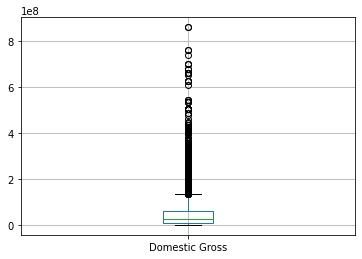

In [69]:
# Let's see the domestic gross using a boxplot to look at the spread of data
finalMovie_df.boxplot(column='Domestic Gross')

We notice some outliers between 8 and 6 and more predominantly around 8. We should look at what those movies are

In [70]:
# Find the highest grossing films 
finalMovie_df.sort_values(["Domestic Gross"], ascending=False).head(20)

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis,tconst,titleType,primaryTitle,region,language,isOriginalTitle
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall,tt4154796,movie,Avengers: Endgame,US,\N,0
1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall,tt4154796,movie,Avengers: Endgame,US,en,0
28,2009-12-17,Avatar,237000000,760507625,2845899541,2608899541,2085391916,12,2009,Winter,Summer,tt0499549,movie,Avatar,US,\N,0
29,2009-12-17,Avatar,237000000,760507625,2845899541,2608899541,2085391916,12,2009,Winter,Summer,tt1775309,movie,Avatar,US,\N,0
78,2021-12-14,Spider-Man: No Way Home,200000000,735886280,1738886280,1538886280,1003000000,12,2021,Winter,Summer,tt10872600,movie,Spider-Man: No Way Home,US,\N,0
81,2018-02-13,Black Panther,200000000,700059566,1336494321,1136494321,636434755,02,2018,Winter,Summer,tt2905856,movie,Black Panther,US,\N,0
80,2018-02-13,Black Panther,200000000,700059566,1336494321,1136494321,636434755,02,2018,Winter,Summer,tt1825683,movie,Black Panther,US,\N,0
79,2018-02-13,Black Panther,200000000,700059566,1336494321,1136494321,636434755,02,2018,Winter,Summer,tt1825683,movie,Black Panther,US,en,0
5,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall,tt4154756,movie,Avengers: Infinity War,US,\N,0
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall,tt4154756,movie,Avengers: Infinity War,US,en,0


In [71]:
# Find the highest grossing films globally
finalMovie_df.sort_values(["Worldwide Gross"], ascending=False).head(20)

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis,tconst,titleType,primaryTitle,region,language,isOriginalTitle
28,2009-12-17,Avatar,237000000,760507625,2845899541,2608899541,2085391916,12,2009,Winter,Summer,tt0499549,movie,Avatar,US,\N,0
29,2009-12-17,Avatar,237000000,760507625,2845899541,2608899541,2085391916,12,2009,Winter,Summer,tt1775309,movie,Avatar,US,\N,0
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall,tt4154796,movie,Avengers: Endgame,US,\N,0
1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall,tt4154796,movie,Avengers: Endgame,US,en,0
86,1997-12-18,Titanic,200000000,659363944,2207986545,2007986545,1548622601,12,1997,Winter,Summer,tt8852130,movie,Titanic,US,\N,0
82,1997-12-18,Titanic,200000000,659363944,2207986545,2007986545,1548622601,12,1997,Winter,Summer,tt0036443,movie,Titanic,US,\N,0
83,1997-12-18,Titanic,200000000,659363944,2207986545,2007986545,1548622601,12,1997,Winter,Summer,tt0046435,movie,Titanic,US,\N,0
84,1997-12-18,Titanic,200000000,659363944,2207986545,2007986545,1548622601,12,1997,Winter,Summer,tt0120338,movie,Titanic,US,en,0
85,1997-12-18,Titanic,200000000,659363944,2207986545,2007986545,1548622601,12,1997,Winter,Summer,tt0120338,movie,Titanic,US,\N,0
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall,tt4154756,movie,Avengers: Infinity War,US,en,0


In [72]:
# find hte highest grossing films and sort by domestic gross and season
finalMovie_df.sort_values(["Domestic Gross","Season_N_Hemis"], ascending=False).head(20)

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis,tconst,titleType,primaryTitle,region,language,isOriginalTitle
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall,tt4154796,movie,Avengers: Endgame,US,\N,0
1,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall,tt4154796,movie,Avengers: Endgame,US,en,0
28,2009-12-17,Avatar,237000000,760507625,2845899541,2608899541,2085391916,12,2009,Winter,Summer,tt0499549,movie,Avatar,US,\N,0
29,2009-12-17,Avatar,237000000,760507625,2845899541,2608899541,2085391916,12,2009,Winter,Summer,tt1775309,movie,Avatar,US,\N,0
78,2021-12-14,Spider-Man: No Way Home,200000000,735886280,1738886280,1538886280,1003000000,12,2021,Winter,Summer,tt10872600,movie,Spider-Man: No Way Home,US,\N,0
79,2018-02-13,Black Panther,200000000,700059566,1336494321,1136494321,636434755,02,2018,Winter,Summer,tt1825683,movie,Black Panther,US,en,0
80,2018-02-13,Black Panther,200000000,700059566,1336494321,1136494321,636434755,02,2018,Winter,Summer,tt1825683,movie,Black Panther,US,\N,0
81,2018-02-13,Black Panther,200000000,700059566,1336494321,1136494321,636434755,02,2018,Winter,Summer,tt2905856,movie,Black Panther,US,\N,0
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall,tt4154756,movie,Avengers: Infinity War,US,en,0
5,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall,tt4154756,movie,Avengers: Infinity War,US,\N,0


We notice that most of the highest grossing films are release in the winter followed by spring and summer so perhaps it would aid us in looking at this data using pairplots but before we do that, runtime and tconst are causing too many duplicates in our data creating discrepancies across the spread. Since we don't need tconst to merge anymore data and runtime is inconsistent, we can drop both fields. We can drop primarytitle as well as titleType since we are only dealing with movies and its presence in the dataset no longer holds significance

In [73]:
finalMovie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8072 entries, 0 to 8071
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Release Date        8072 non-null   object
 1   Movie               8072 non-null   object
 2   Production Budget   8072 non-null   int64 
 3   Domestic Gross      8072 non-null   int64 
 4   Worldwide Gross     8072 non-null   int64 
 5   Gross Profit        8072 non-null   int64 
 6   Non-Domestic Gross  8072 non-null   int64 
 7   month               8072 non-null   object
 8   year                8072 non-null   object
 9   Season_N_Hemis      8072 non-null   object
 10  Season_S_Hemis      8072 non-null   object
 11  tconst              8072 non-null   object
 12  titleType           8072 non-null   object
 13  primaryTitle        8072 non-null   object
 14  region              8072 non-null   object
 15  language            8072 non-null   object
 16  isOriginalTitle     8072

In [74]:
# drop tconst, runtimeMinutes, primaryTitle, and titleType
finalMovie_df.shape
finalMovie_df.drop(['tconst','titleType','primaryTitle','region','language','isOriginalTitle','tconst'], axis=1, inplace=True)
finalMovie_df.shape

(8072, 17)

(8072, 11)

In [75]:
# drop duplicate records
finalMovie_df.shape
finalMovie_df.drop_duplicates(inplace=True)
finalMovie_df.shape

(8072, 11)

(4620, 11)

In [76]:
finalMovie_df.head()
finalMovie_df.info()

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,666713802,804642000,05,2011,Spring,Fall
3,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,1030316979,936311111,04,2015,Spring,Fall
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall
6,2017-11-13,Justice League,300000000,229024295,655945209,355945209,426920914,11,2017,Fall,Spring


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 8071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Release Date        4620 non-null   object
 1   Movie               4620 non-null   object
 2   Production Budget   4620 non-null   int64 
 3   Domestic Gross      4620 non-null   int64 
 4   Worldwide Gross     4620 non-null   int64 
 5   Gross Profit        4620 non-null   int64 
 6   Non-Domestic Gross  4620 non-null   int64 
 7   month               4620 non-null   object
 8   year                4620 non-null   object
 9   Season_N_Hemis      4620 non-null   object
 10  Season_S_Hemis      4620 non-null   object
dtypes: int64(5), object(6)
memory usage: 433.1+ KB


In [77]:
# convert month and year to in
finalMovie_df['year'] = finalMovie_df['year'].astype(int)

In [78]:
finalMovie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4620 entries, 0 to 8071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Release Date        4620 non-null   object
 1   Movie               4620 non-null   object
 2   Production Budget   4620 non-null   int64 
 3   Domestic Gross      4620 non-null   int64 
 4   Worldwide Gross     4620 non-null   int64 
 5   Gross Profit        4620 non-null   int64 
 6   Non-Domestic Gross  4620 non-null   int64 
 7   month               4620 non-null   object
 8   year                4620 non-null   int64 
 9   Season_N_Hemis      4620 non-null   object
 10  Season_S_Hemis      4620 non-null   object
dtypes: int64(6), object(5)
memory usage: 433.1+ KB


In [79]:
# let's find the highest grossing films and sort by domestic gross and season once again to look at the data
finalMovie_df.sort_values(["Domestic Gross","Season_N_Hemis"], ascending=False).head(20)

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall
28,2009-12-17,Avatar,237000000,760507625,2845899541,2608899541,2085391916,12,2009,Winter,Summer
78,2021-12-14,Spider-Man: No Way Home,200000000,735886280,1738886280,1538886280,1003000000,12,2021,Winter,Summer
79,2018-02-13,Black Panther,200000000,700059566,1336494321,1136494321,636434755,02,2018,Winter,Summer
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall
82,1997-12-18,Titanic,200000000,659363944,2207986545,2007986545,1548622601,12,1997,Winter,Summer
51,2015-06-09,Jurassic World,215000000,652306625,1669979967,1454979967,1017673342,06,2015,Summer,Winter
34,2012-04-25,The Avengers,225000000,623357910,1515100211,1290100211,891742301,04,2012,Spring,Fall
87,2018-06-15,Incredibles 2,200000000,608581744,1242805359,1042805359,634223615,06,2018,Summer,Winter
11,2019-07-11,The Lion King,260000000,543638043,1654367425,1394367425,1110729382,07,2019,Summer,Winter


The data is currently proving my intial hypothesis to be false as highest grossing films seems to be released during summer and spring so let's once again, plot the data this time using a pair plot to look closer at correlations within the dataset but before we do that, let's sum/group some of these values to get an overall view of the picture.

In [80]:
# grouping data by season and year, and sum Domestic Gross, count of movie releases
finalMovie_grp = finalMovie_df.groupby(['Season_N_Hemis','year'])['Domestic Gross'].agg(['sum','count']) \
.sort_values(by = ['sum'] , ascending=False).reset_index()
finalMovie_grp.head(50)

,Season_N_Hemis,year,sum,count
0,Summer,2010,3024744543,50
1,Winter,2016,2928226344,51
2,Spring,2019,2915951849,31
3,Summer,2013,2884998263,39
4,Summer,2015,2701229549,48
5,Summer,2009,2691757712,40
6,Summer,2016,2685865948,40
7,Spring,2012,2681221708,43
8,Spring,2018,2641602312,35
9,Summer,2012,2610608934,41


In [81]:
# grouping data by season, and sum Domestic Gross, count of movie releases
finalMovie_grp1 = finalMovie_df.groupby(['Season_N_Hemis'])['Domestic Gross'].agg(['sum','count']) \
.sort_values(by = ['sum'] , ascending=False).reset_index()
finalMovie_grp1.head(50)

,Season_N_Hemis,sum,count
0,Summer,67784007415,1163
1,Spring,53312047583,1071
2,Winter,52446537320,1078
3,Fall,51633237550,1308


In [82]:
# grouping data by Northern Hemisphere_seasons, and sum worldwide Gross, count of movie releases
finalMovie_grp1 = finalMovie_df.groupby(['Season_N_Hemis'])['Worldwide Gross'].agg(['sum','count']) \
.sort_values(by = ['sum'] , ascending=False).reset_index()
finalMovie_grp1.head(50)

,Season_N_Hemis,sum,count
0,Summer,144939439619,1163
1,Spring,122238681134,1071
2,Fall,113489300798,1308
3,Winter,109959931179,1078


In [83]:
# grouping data by Southern Hemisphere_seasons, and sum worldwide Gross, count of movie releases
finalMovie_grp1 = finalMovie_df.groupby(['Season_S_Hemis'])['Worldwide Gross'].agg(['sum','count']) \
.sort_values(by = ['sum'] , ascending=False).reset_index()
finalMovie_grp1.head(50)

,Season_S_Hemis,sum,count
0,Winter,144939439619,1163
1,Fall,122238681134,1071
2,Spring,113489300798,1308
3,Summer,109959931179,1078


<div style="background-color:green;color:white;">
     <b>Getting worldwide gross of all the seasons in the dataset, shows that the summer season is the highest grossing season in the northern hemisphere (US)
    as well as the highest producer of films which translates to winter in the southern hemisphere. We'll continue to extrapolate to further to determine if this is more
         so evident by year for the last 30 years</b>
    </div>

In [84]:
finalMovie_df1 = finalMovie_df[(finalMovie_df['year'] > 1990) & (finalMovie_df['year'] < 2022)].copy()

In [85]:
finalMovie_df1

,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,04,2019,Spring,Fall
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,666713802,804642000,05,2011,Spring,Fall
3,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,1030316979,936311111,04,2015,Spring,Fall
4,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,04,2018,Spring,Fall
6,2017-11-13,Justice League,300000000,229024295,655945209,355945209,426920914,11,2017,Fall,Spring
...,...,...,...,...,...,...,...,...,...,...,...
8067,2012-01-13,Newlyweds,9000,4584,4584,-4416,0,01,2012,Winter,Summer
8068,1993-02-26,El Mariachi,7000,2040920,2041928,2034928,1008,02,1993,Winter,Summer
8069,2004-10-08,Primer,7000,424760,841926,834926,417166,10,2004,Fall,Spring
8070,1999-04-02,Following,6000,48482,240495,234495,192013,04,1999,Spring,Fall


In [86]:
finalMovie_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4115 entries, 0 to 8071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Release Date        4115 non-null   object
 1   Movie               4115 non-null   object
 2   Production Budget   4115 non-null   int64 
 3   Domestic Gross      4115 non-null   int64 
 4   Worldwide Gross     4115 non-null   int64 
 5   Gross Profit        4115 non-null   int64 
 6   Non-Domestic Gross  4115 non-null   int64 
 7   month               4115 non-null   object
 8   year                4115 non-null   int64 
 9   Season_N_Hemis      4115 non-null   object
 10  Season_S_Hemis      4115 non-null   object
dtypes: int64(6), object(5)
memory usage: 385.8+ KB


In [87]:
# exporting final file
finalMovie_df1.to_csv('highGrossmoviesFinal.csv',index = False)
#datatoexcel.save()

In [90]:
finalMovie_grp2 = finalMovie_df1.groupby(['year','Season_N_Hemis']) \
.agg({'Worldwide Gross': 'sum', 'Domestic Gross':'sum', 'Non-Domestic Gross':'sum', 'Gross Profit': 'sum'}) \
.sort_values(by = ['year'] , ascending=False).reset_index()
finalMovie_grp2.head(50)

,year,Season_N_Hemis,Worldwide Gross,Domestic Gross,Non-Domestic Gross,Gross Profit
0,2021,Winter,2473752194,1042736339,1431015855,1645752194
1,2021,Summer,1114400514,522261116,592139398,319927785
2,2021,Spring,1080768656,338374926,742393730,678436656
3,2021,Fall,2705456402,1063523561,1641932841,1454156402
4,2020,Winter,1087148466,488409967,598738499,93768466
5,2020,Summer,496173222,132351315,363821907,80873222
6,2020,Spring,47932083,31628458,16303625,-5333917
7,2020,Fall,248832449,81989595,166842854,143732449
8,2019,Winter,3748186460,1547195276,2200991184,2550686460
9,2019,Summer,5084807494,1946371658,3138435836,3801607494


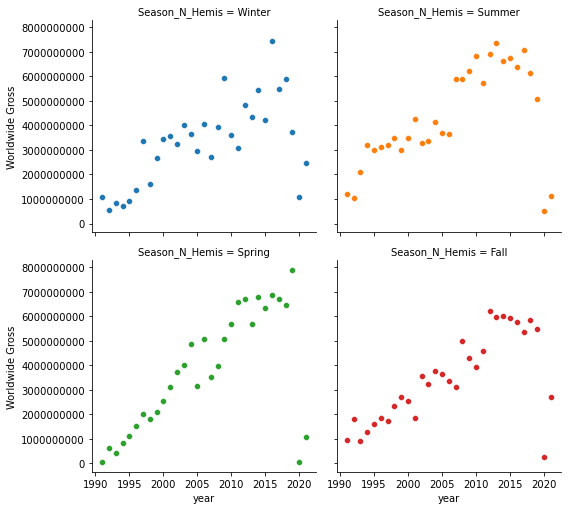

In [96]:
salesSeason = finalMovie_grp2
g = sns.FacetGrid(salesSeason, col="Season_N_Hemis", height=3.5, col_wrap=2, hue="Season_N_Hemis")
g.map_dataframe(sns.scatterplot, x="year", y="Worldwide Gross")
plt.ticklabel_format(style='plain', axis='y')
g.set_axis_labels("year", "Worldwide Gross")

<div style="background-color:green;color:white;">
     <b>The scatterplot confirms that summer has the highest grossing films between 2010 and 2020.
    However, we note that around 2018 and 2020 spring has several outliers that may produced higher gross than summer. The boxplot below further confirms that summer and spring have highest grossing films based on the the median third quartile. </b>
    </div>

<Figure size 936x360 with 0 Axes>

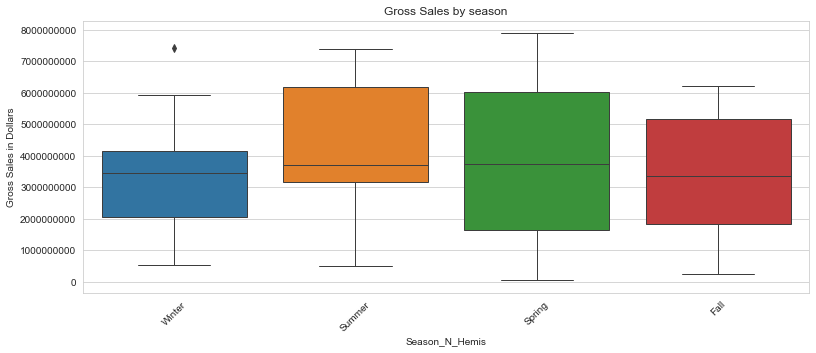

In [98]:
plt.figure(figsize = (13,5))
ax = sns.set_style("whitegrid")
ax = sns.boxplot(x = 'Season_N_Hemis', y = 'Worldwide Gross',data = finalMovie_grp2, linewidth=1)
ax = ax.set_ylabel("Gross Sales in Dollars", fontsize = 10)
ax = plt.title('Gross Sales by season')
ax = plt.xticks(rotation=45)
ax = plt.ticklabel_format(style='plain', axis='y')

<div style="background-color:green;color:white;">
     <b>Let's check to see if there's any correlation between year, domestic gross, and production cost. Based on the heatmap at the below, there seems to be no correlation between any of the selected variables </b>
    </div>

In [ ]:
columns = finalMovie_grp2.columns[:4]
correlations = finalMovie_grp2[columns]

correlationMatrix = correlations.corr()
#mask = np.triu(np.ones_like(correlationMatrix, dtype=bool))

f, ax = plt.subplots(figsize=(9,6))

sns.heatmap(correlationMatrix, vmax=.9, square=True, annot=True, cmap='inferno', linewidth=.6)

In [ ]:
finalMovie_df1.info()

In [ ]:
# get max of each season by year
'''
Potential ideas to further analysis:
* look at southern hemisphere vs northern to determine if summer is only the highest grossing in the northern 
  hemisphere.
* Do movie studios recognize the international market's ability to tip the scale of total gross sales?
* Has summer always been the highest grossing season?
* Are the outliers contributing to the summer's weight?
'''
#x = finalMovie_grp2.groupby(['season']).max(['Domestic Gross'])
#x.reset_index()